In [17]:
# 导入
from sklearn import tree
from sklearn.datasets import load_wine #红酒数据集
from sklearn.model_selection import train_test_split #分割数据集

In [18]:
wine=load_wine()
print(wine)
print(wine.data)
print(wine.target)
print('====数据形状：',wine.data.shape)
print('====属性名称：',wine.feature_names)
print('====标签名称：',wine.target_names)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [19]:
#将数据与标签组合为一张表进行对应
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis=1)
 


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)


In [26]:
Xtrain

array([[1.208e+01, 1.390e+00, 2.500e+00, ..., 9.300e-01, 3.190e+00,
        3.850e+02],
       [1.236e+01, 3.830e+00, 2.380e+00, ..., 5.600e-01, 1.580e+00,
        5.200e+02],
       [1.358e+01, 2.580e+00, 2.690e+00, ..., 7.400e-01, 1.800e+00,
        7.500e+02],
       ...,
       [1.204e+01, 4.300e+00, 2.380e+00, ..., 7.900e-01, 2.570e+00,
        5.800e+02],
       [1.394e+01, 1.730e+00, 2.270e+00, ..., 1.120e+00, 3.100e+00,
        1.260e+03],
       [1.208e+01, 1.830e+00, 2.320e+00, ..., 1.080e+00, 2.270e+00,
        4.800e+02]])

In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=20 #用来设置分枝中的随机数量(默认为None)
                                  ,splitter="random" #用来控制决策树中的随机选项(best,random)
                                  )
clf = clf.fit(Xtrain, Ytrain) 
score = clf.score(Xtest, Ytest)  #在验证数据上的准确度



In [22]:
score

0.9814814814814815

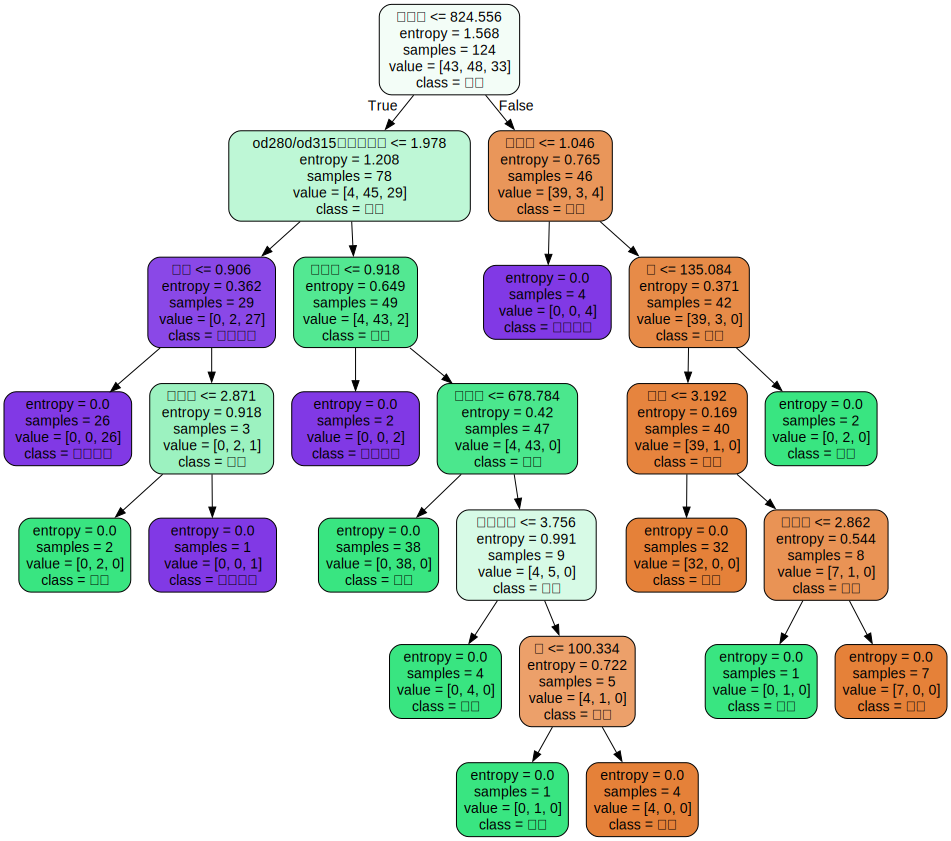

In [23]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸'] #由于原数据集特征名是英文在此进行了中文赋值

import graphviz

dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names = ["琴酒","雪莉","贝尔摩德"] #原数据集中类名有三种，对类名进行重新赋值
                                ,filled=True #进行颜色填充
                                ,rounded=True #将树中方形改为圆形
                                )
graph = graphviz.Source(dot_data) #从dot_data中获取生成树的代码并赋值给graph
graph #输出树


In [31]:
predict_data=[[14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0],[13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0]]

In [32]:
clf.predict(predict_data)


array([0, 2])